# Pi Day 2014

Consider a unit-radius circle inscribed on a 2-unit square. The area of the circle is $A_c = \pi r^2$; with $r = 1$, $A_c = \pi$.
The area of the square is $A_s = 2^2=4$.
The ratio of areas is $A_c / A_s = \pi/4 \approx 0.785$.
We can use this to estimate $\pi$ by randomly selecting $n_s$ points in the unit square and computing the fraction $n_c / n_s$ that fall within the unit circle: then $\hat{\pi} = 4 n_c / n_s$.

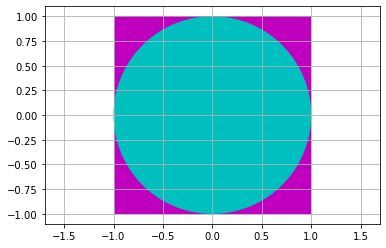

In [6]:
import numpy as np
import numpy.random as rand
import matplotlib.pylab as plt

theta = np.linspace (0, 2 * np.pi, 1000)
plt.fill ((1, 1, -1, -1), (1, -1, -1, 1), 'm')
plt.fill (np.cos (theta), np.sin (theta), 'c')
plt.axis ('equal')
plt.grid ();

For example: the plot below shows 1000 random points uniformly distributed on $[0, 1)^2$. Points within the unit circle are cyan, points outside are magenta.

777/1000 points in circle; pi approximation = 3.108000



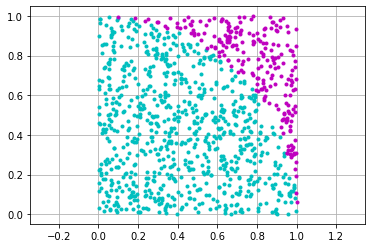

In [7]:
pairs = rand.uniform (size=(2, 1000))
r2 = np.sum (pairs * pairs, axis=0)

plt.plot (pairs[0, r2 <= 1.0], pairs[1, r2 <= 1.0], '.c',
          pairs[0, r2 > 1.0], pairs[1, r2 > 1.0], '.m')
plt.grid ()
plt.axis ('equal');

inside = np.sum (r2 <= 1.0)
estimate = inside * 4.0 / pairs.shape[1]
print('{0:d}/{1:d} points in circle; pi approximation = {2:f}\n'.format (inside, pairs.shape[1], estimate))

Notice two optimizations here. First, we only use one quadrant of the unit radius circle: thus the denominator of the fraction is $1$ instead of $4$.
Second, we don't need to compute the actual radius by taking the square root of the sums of coordinates. We only care whether the radius is greater or less than $1.0$, and $1.0^2 = 1.0$.

Now we encapsulate the estimator as a function.

In [8]:
def guess4pi (n=1000000):
    """Monte Carlo estimate of pi."""
    coord = rand.uniform (size=(2, n))
    outside = np.sum (np.sum (coord * coord, axis=0) <= 1.0)
    return (outside, n)

Kick the tires:

In [10]:
zzz = guess4pi()
print('{0:d} * 4 / {1:d} = {2:f}'.format (zzz[0], zzz[1], zzz[0] * 4.0 / zzz[1]))

785272 * 4 / 1000000 = 3.141088


That's nice, dear. Now let's try a bunch of them and see if they converge on $\pi$.

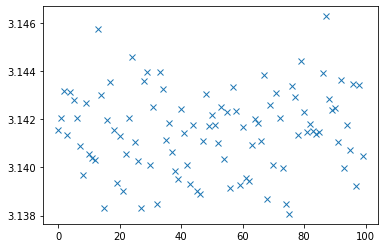

In [12]:
rats = np.fromiter ((guess4pi()[0] for x in range(100)), dtype=float) * 4.0 / 1.0e6
plt.plot (rats, 'x');

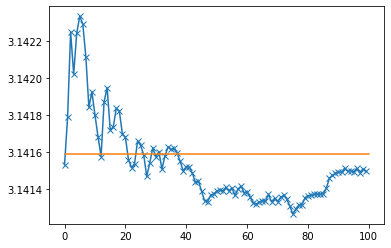

In [13]:
plt.plot (np.cumsum (rats) / (1 + np.arange (len (rats))), 'x-',
          (0, len (rats)), (np.pi, np.pi));

That's not bad, but not great, either. There's no reason for the estimates to converge monotonically: successive iterations do not make direct use of the accuracy of previous estimates. Work remains for Pi Day 2015! See you on 3/14/15 at 9:26. Approximately.